In [170]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
import urllib.request

In [171]:
# 1. 데이터 불러오기
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")

train_data=pd.read_table('ratings_train.txt')
test_data=pd.read_table('ratings_test.txt')


In [172]:
print(train_data)

              id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[150000 rows x 3 columns]


In [173]:
# 파일을 저장해서 불러오기
# train_data.to_csv('train_data.csv')
# test_data.to_csv('test_data.csv')

In [174]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [175]:
print('댓글개수 : ',len(train_data))

댓글개수 :  150000


In [176]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [177]:
# train_data : 150000 / test_data : 50000
print('test_data : ',len(test_data))

test_data :  50000


In [178]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [179]:
# unique() : 중복을 제거하고 출력
# nunique() : 중복을 제거하고 숫자를 출력
# 150000,50000 -> 146182,49157
train_data['document'].nunique(),test_data['document'].nunique()

(146182, 49157)

In [180]:
# document 컬럼에서 중복을 제거하고 저장
train_data.drop_duplicates(subset=['document'],inplace=True)

In [181]:
print('중복제거후 개수 : ',len(train_data))

중복제거후 개수 :  146183


<AxesSubplot:>

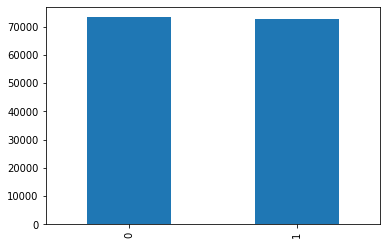

In [182]:
# label의 값별로 데이터의 수를 출력
train_data['label'].value_counts().plot(kind='bar')


In [183]:
# label의 값으로 개수 출력
# 0    73342
# 1    72841
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,73342
1,1,72841


In [184]:
# 데이터 개수 확인
# null개수 확인
# train_data : null값이 있으면 True, 없으면 False
train_data.isnull().values.any()

True

In [185]:
# null값의 개수를 알려줌    
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [186]:
# null데이터 행 출력
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [187]:
# null 데이터의 행을 삭제
train_data=train_data.dropna(how='any')

In [188]:
train_data.isnull().values.any()

# False이기 때문에 null부분이 삭제가 된것을 확인할 수 있음

False

In [189]:
print(len(train_data)) # 146183 -> 146182

146182


In [190]:
# 정규표현식
import re
eng_txt='aaa bbbcd love 111 33you i~~~ !! kfaq, @#$'
re.sub(r'[^a-zA-Z ]','',eng_txt)


'aaa bbbcd love  you i  kfaq '

In [191]:
# 한글만 제외하고 모두 삭제처리 
train_data['document'] = train_data['document'].str.replace('[^ㄱ-하-ㅣ가-힣 ]','')
train_data[:5]
# train_data.head()

C:\Users\jmpkorea13\AppData\Local\Temp\ipykernel_9100\1214413161.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-하-ㅣ가-힣 ]','')


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [192]:
# replace 하면 빈공백만 존재하는 데이터가 존재할 수 있음 ; 행
train_data['document'] = train_data['document'].str.replace('^ +','')


C:\Users\jmpkorea13\AppData\Local\Temp\ipykernel_9100\3420146498.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +','')


In [193]:
# '   ' 빈공백 -> null 변경
train_data['document'].replace('',np.nan,inplace=True)
# null데이터 개수
train_data.isnull().sum()


id            0
document    747
label         0
dtype: int64

In [194]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [195]:
# null 삭제
# 145435
train_data=train_data.dropna(how='any')
print(len(train_data))

145435


In [196]:
# document 컬럼에서 중복을 제거하고 저장
test_data.drop_duplicates(subset=['document'],inplace=True)

In [197]:
print('중복제거후 개수 : ',len(test_data))

중복제거후 개수 :  49158


In [198]:
# null삭제
test_data.isnull().values.any()
test_data.loc[test_data.document.isnull()]
test_data=test_data.dropna(how='any')

In [199]:
test_data.isnull().values.any()

False

In [200]:
# 정규표현식
import re

test_data['document']=test_data['document'].str.replace('^ㄱ-하-ㅣ가-힣 ','')


C:\Users\jmpkorea13\AppData\Local\Temp\ipykernel_9100\3492382732.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document']=test_data['document'].str.replace('^ㄱ-하-ㅣ가-힣 ','')


In [201]:
# replace 하면 빈공백만 존재하는 데이터가 존재할 수 있음 ; 행
test_data['document'] = test_data['document'].str.replace('^ +','')


C:\Users\jmpkorea13\AppData\Local\Temp\ipykernel_9100\3376817057.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +','')


In [202]:
# '   ' 빈공백 -> null 변경
test_data['document'].replace('',np.nan,inplace=True)
# null데이터 개수
test_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [203]:
# null 삭제
# 145435
test_data=test_data.dropna(how='any')
print(len(test_data))

49157


## 형태소분석

In [204]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [205]:
from konlpy.tag import Okt
okt=Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔',stem=True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [206]:
from tqdm import tqdm
# tqdm : 진행바를 출력
X_train=[]
# train_data['document'] 대략 14만개
for sentence in tqdm(train_data['document']):
    token_sentence = okt.morphs(sentence,stem=True)
    # 불용어 제거
    stopwords_re_sentence=[word for word in token_sentence if not word in stopwords]
    # X_train : 추가
    X_train.append(stopwords_re_sentence)

100%|██████████| 145435/145435 [05:23<00:00, 449.62it/s]


In [207]:
print(X_train[:5])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'], ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'], ['사이', '몬페', '그', '익살스럽다', '연기', '돋보이다', '영화', '스파이더맨', '에서', '늙다', '보이다', '커스틴', '던스트', '너무나도', '이쁘다', '보이다']]


In [208]:
from tqdm import tqdm
# tqdm : 진행바를 출력
X_test=[]
# train_data['document'] 대략 14만개
for sentence in tqdm(test_data['document']):
    token_sentence = okt.morphs(sentence,stem=True)
    # 불용어 제거
    stopwords_re_sentence=[word for word in token_sentence if not word in stopwords]
    # X_train : 추가
    X_test.append(stopwords_re_sentence)

100%|██████████| 49157/49157 [01:46<00:00, 463.27it/s]


In [209]:
X_test[:5]

[['굳다', 'ㅋ'],
 ['GDNTOPCLASSINTHECLUB'],
 ['뭐', '야', '평점', '....', '나쁘다', '않다', '10', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '...', '돈', '주다', '보기', '에는', '....'],
 ['3',
  'D',
  '만',
  '아니다',
  '별',
  '다섯',
  '개',
  '주다',
  '..',
  '왜',
  '3',
  'D',
  '로',
  '나오다',
  '제',
  '심기',
  '불편하다',
  '??']]

## 단어에 번호 부여 = Tokenizer()

In [210]:
# 정수인코딩 - 단어 빈도가 높은 순서부터 번호를 부여
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
# 번호 부여, 횟수가 많은 순서부터 번호를 매김
tokenizer.fit_on_texts(X_train)

In [211]:
# 글자 : 순번
# print(tokenizer.word_index)

In [212]:
# # 글자 : 횟수
# tokenizer.word_counts.items()
total_freg=0
rare_cnt=0
rare_freg=0
total_cnt=len(tokenizer.word_index) # 단어의 수 43752
for key,value in tokenizer.word_counts.items():  
    total_freg=total_freg + value # 단어가 나온 총 횟수
    # 나온 횟수가 3번 미만인 경우
    if (value < 3):
        rare_cnt=rare_cnt+1
        rare_freg=rare_freg + value

print('단어 총 개수 : ',total_cnt)
print('3번 미만의 단어집합의 비율 : ',(rare_cnt/total_cnt)*100)


단어 총 개수 :  43887
3번 미만의 단어집합의 비율 :  55.71353703830292


In [213]:
# 2번 이하 나온 단어를 제외한 단어집합의 크기 : 19437
vocab_size=total_cnt-rare_cnt+1
print('단어집합의 크기 : ',vocab_size)

단어집합의 크기 :  19437


In [214]:
# 19437
tokenizer=Tokenizer(vocab_size)
# 단어에 번호를 부여
tokenizer.fit_on_texts(X_train)
# 부여받은 단어를 가지고, train,test 데이터의 document 내용을 번호로 변경
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [215]:
# X_train글자가 번호로 변경되어 출력
print(X_train[:3])

[[50, 457, 16, 261, 661], [935, 459, 41, 604, 1, 215, 1451, 24, 963, 677, 19], [388, 2446, 2317, 5673, 2, 223, 9]]


In [216]:
# label 값 분리
y_train=np.array(train_data['label'])
y_test=np.array(test_data['label'])

In [217]:
# 빈샘플 제거 - len(X_train) <1 이하는 제거
# for len(X_train) 

In [218]:
# 최대길이 : 69, 평균길이 : 10.808
print('최대길이 : ',max(len(review) for review in X_train))
print('평균길이 : ',sum(map(len,X_train))/len(X_train))

최대길이 :  69
평균길이 :  10.808120466187644


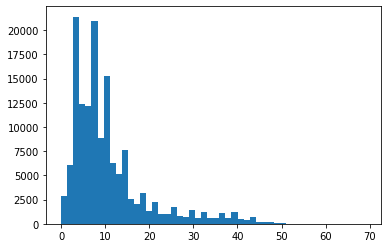

In [219]:
plt.hist([len(review) for review in X_train],bins=50)
plt.show()

In [220]:
# 패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train=pad_sequences(X_train,maxlen=30)
X_test=pad_sequences(X_test,maxlen=30)

In [225]:

# 순환 신경망 선언
model=keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,100,input_length=30))
# LSTM
model.add(keras.layers.LSTM(128,dropout=0.3,return_sequences=True))
model.add(keras.layers.LSTM(128,dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [226]:
# 순환신경망 설정 adam, RMSprop
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics='accuracy')


In [227]:
# 콜백 - 20번돌고나서, 가장 낮은 손실률을 저장
check_cb=keras.callbacks.ModelCheckpoint('naver-lstm.h5',save_best_only=True)
early_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=20,batch_size=64,\
    validation_data=(X_test,y_test),callbacks=[check_cb,early_cb])


Epoch 1/20
2273/2273 [==============================] - 120s 51ms/step - loss: 0.4896 - accuracy: 0.7539 - val_loss: 0.3961 - val_accuracy: 0.8215
Epoch 2/20
2273/2273 [==============================] - 123s 54ms/step - loss: 0.3780 - accuracy: 0.8301 - val_loss: 0.3787 - val_accuracy: 0.8302
Epoch 3/20
2273/2273 [==============================] - 126s 56ms/step - loss: 0.3628 - accuracy: 0.8397 - val_loss: 0.3758 - val_accuracy: 0.8334
Epoch 4/20
2273/2273 [==============================] - 129s 57ms/step - loss: 0.3554 - accuracy: 0.8435 - val_loss: 0.3717 - val_accuracy: 0.8342
Epoch 5/20
2273/2273 [==============================] - 126s 56ms/step - loss: 0.3504 - accuracy: 0.8460 - val_loss: 0.3679 - val_accuracy: 0.8354
Epoch 6/20
2273/2273 [==============================] - 137s 60ms/step - loss: 0.3462 - accuracy: 0.8476 - val_loss: 0.3634 - val_accuracy: 0.8374
Epoch 7/20
2273/2273 [==============================] - 125s 55ms/step - loss: 0.3409 - accuracy: 0.8500 - val_loss: 0

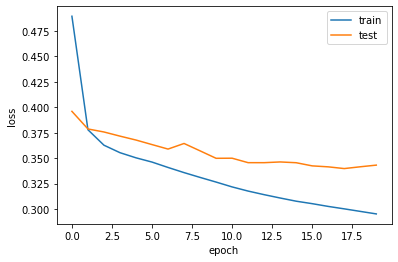

In [228]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [229]:
# 정확도
score= model.evaluate(X_test,y_test)
print('loss, accuracy : ', score)


1537/1537 [==============================] - 16s 11ms/step - loss: 0.3432 - accuracy: 0.8499
loss, accuracy :  [0.34319403767585754, 0.8499298095703125]


In [230]:
loaded_model=keras.models.load_model('naver-lstm.h5')

In [231]:
# 데이터 전처리 함수
def txt_predict(new_sentence):
    # 1. 한글처리
    new_sentence=re.sub(r'[^ㄱ-하-ㅣ가-힣]','',new_sentence)
    # 2. 형태소 분석
    new_sentence=okt.morphs(new_sentence,stem=True)
    # 3. 불용어 제거
    new_sentence = [word for word in new_sentence if not word in stopwords]
    # 4. 단어를 번호로 변경
    encoded=tokenizer.texts_to_sequences([new_sentence])
    # 5. 패딩
    pad_new=pad_sequences(encoded,maxlen=30)
    # 6. 예측
    score=float(loaded_model.predict(pad_new))
    if(score>0.5):
        print('{:.2f} 확률로 긍정 리뷰입니다.'.format(score*100))
    else:
        print('{:.2f} 확률로 부정 리뷰입니다.'.format((1-score)*100))

In [232]:
# 1개를 입력받음
txt='이 영화 너무 재미있음'
txt_predict(txt)

1/1 [==============================] - 1s 576ms/step
97.43 확률로 긍정 리뷰입니다.


In [233]:
txt2='이딴게 영화야~ 감독바꿔'
txt_predict(txt2)

1/1 [==============================] - 0s 16ms/step
99.07 확률로 부정 리뷰입니다.
